In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import (PCA, IncrementalPCA,
                                   KernelPCA, TruncatedSVD,
                                   MiniBatchDictionaryLearning,
                                   SparsePCA)
from sklearn.manifold import Isomap, LocallyLinearEmbedding,TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
                               
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
SEED = 42
np.random.seed(SEED)

In [3]:
df = pd.read_csv("df_soliton.csv")
df.head()

,1550.0,1549.8748798925087,1549.7497799834402,1549.624700267904,1549.4996407410108,1549.3746013978732,1549.2495822336057,1549.1245832433235,1548.999604422144,1548.8746457651862,...,1551.1269907041835,1551.0016885905482,1550.8764067194222,1550.751145085901,1550.6259036850813,1550.5006825120613,1550.375481561941,1550.2503008298215,1550.1251403108065,target
0,25.646056,25.650028,25.639966,25.615890,25.577855,25.525948,25.460286,25.381017,25.288318,25.182399,...,24.990649,25.116764,25.230041,25.330229,25.417107,25.490478,25.550179,25.596074,25.628057,cons_one
1,106.806266,112.409808,424.880242,686.914489,1405.909674,32.762638,130.044831,625.502883,1410.410023,115.495991,...,325.588571,138.500308,80.540597,225.456932,649.640334,1.996701,229.406224,761.822174,213.996442,cons_many
2,66.742776,523.683413,317.596944,1046.224701,744.272499,250.673772,426.875556,270.139851,449.280882,289.328584,...,81.704307,349.552649,420.345688,186.359228,363.575276,56.096868,331.010606,199.400477,114.965091,cons_many
3,17.406022,17.368336,17.246741,17.043367,16.761907,16.407466,15.986371,15.505929,14.974164,14.399550,...,14.380802,14.948072,15.474983,15.953217,16.374769,16.732200,17.018902,17.229347,17.359305,cons_one
4,103.739823,103.581529,102.286535,99.899522,96.525690,92.330496,87.533321,82.394103,77.191973,72.194477,...,67.858970,73.340071,78.891431,84.296851,89.358338,93.893959,97.737289,100.739222,102.772649,cons_one


In [4]:
y = df["target"]
float_columns = sorted(df.columns[:-1])
cols = ["target"]
for col in float_columns:
    if 1520 < float(col) < 1580:
        cols.append(col)
X = df[cols]
X = X.drop(columns=["target"])

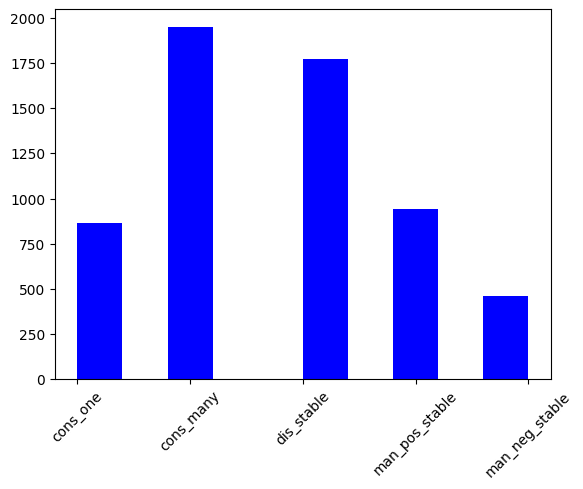

In [5]:
plt.hist(y, facecolor="blue")
plt.xticks(rotation=45);

In [6]:
dim = X.shape[0]
n_classes = len(np.unique(y))
k_neighbors = 3

In [7]:
scaler = StandardScaler()
pca = make_pipeline(scaler,
                    PCA(n_components=2,
                        random_state=SEED))

kpca = make_pipeline(scaler,
                     KernelPCA(kernel="cosine",
                               n_components=2,
                               fit_inverse_transform=True,
                               random_state=SEED,
                               n_jobs=1))

kpca_2 = make_pipeline(scaler,
                     KernelPCA(kernel="sigmoid",
                               n_components=2,
                               gamma=0.05,
                               fit_inverse_transform=True,
                               random_state=SEED,
                               n_jobs=1))

kpca_3 = make_pipeline(scaler,
                     KernelPCA(kernel="rbf",
                               n_components=2,
                               gamma=0.5,
                               fit_inverse_transform=True,
                               random_state=SEED,
                               n_jobs=1))

kpca_4 = make_pipeline(scaler,
                     KernelPCA(kernel="poly",
                               n_components=2,
                               gamma=None,
                               fit_inverse_transform=True,
                               random_state=SEED,
                               n_jobs=1))

GRP = make_pipeline(scaler,
                    GaussianRandomProjection(n_components=2,
                                             eps = 0.5,
                                             random_state=SEED))
lda = make_pipeline(scaler,
                    LinearDiscriminantAnalysis(n_components=2))

nca = make_pipeline(scaler,
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=SEED))
SRP = make_pipeline(scaler,
                    SparseRandomProjection(n_components=2,
                                           density="auto",
                                           eps=0.5,
                                           random_state=SEED,
                                           dense_output = False))

isomap = make_pipeline(scaler,
                       Isomap(n_components=2,
                              n_jobs=4,
                              n_neighbors=5))

miniBatchDictLearning = make_pipeline(scaler,
                                      MiniBatchDictionaryLearning(n_components=2,
                                                                  batch_size=50,
                                                                  alpha=1,
                                                                  n_iter=25,
                                                                  random_state=SEED))
                        

lle = make_pipeline(scaler,
                   LocallyLinearEmbedding(n_components=2,
                                           n_neighbors=10,
                                           n_jobs=4,
                                           random_state=SEED))

tsne = make_pipeline(scaler,TSNE(n_components=2, n_jobs=1,random_state=SEED))


knn = KNeighborsClassifier(n_neighbors=k_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = { 
                         'PCA': pca,                         
                         'LLE': lle,
                         'TSNE': tsne,
                         'KPCA_cos':kpca,
                         'KPCA_sigm':kpca_2,
                         'KPCA_rbf':kpca_3,
                         'KPCA_poly':kpca_4,
                         'IsoMap': isomap, 
                        }

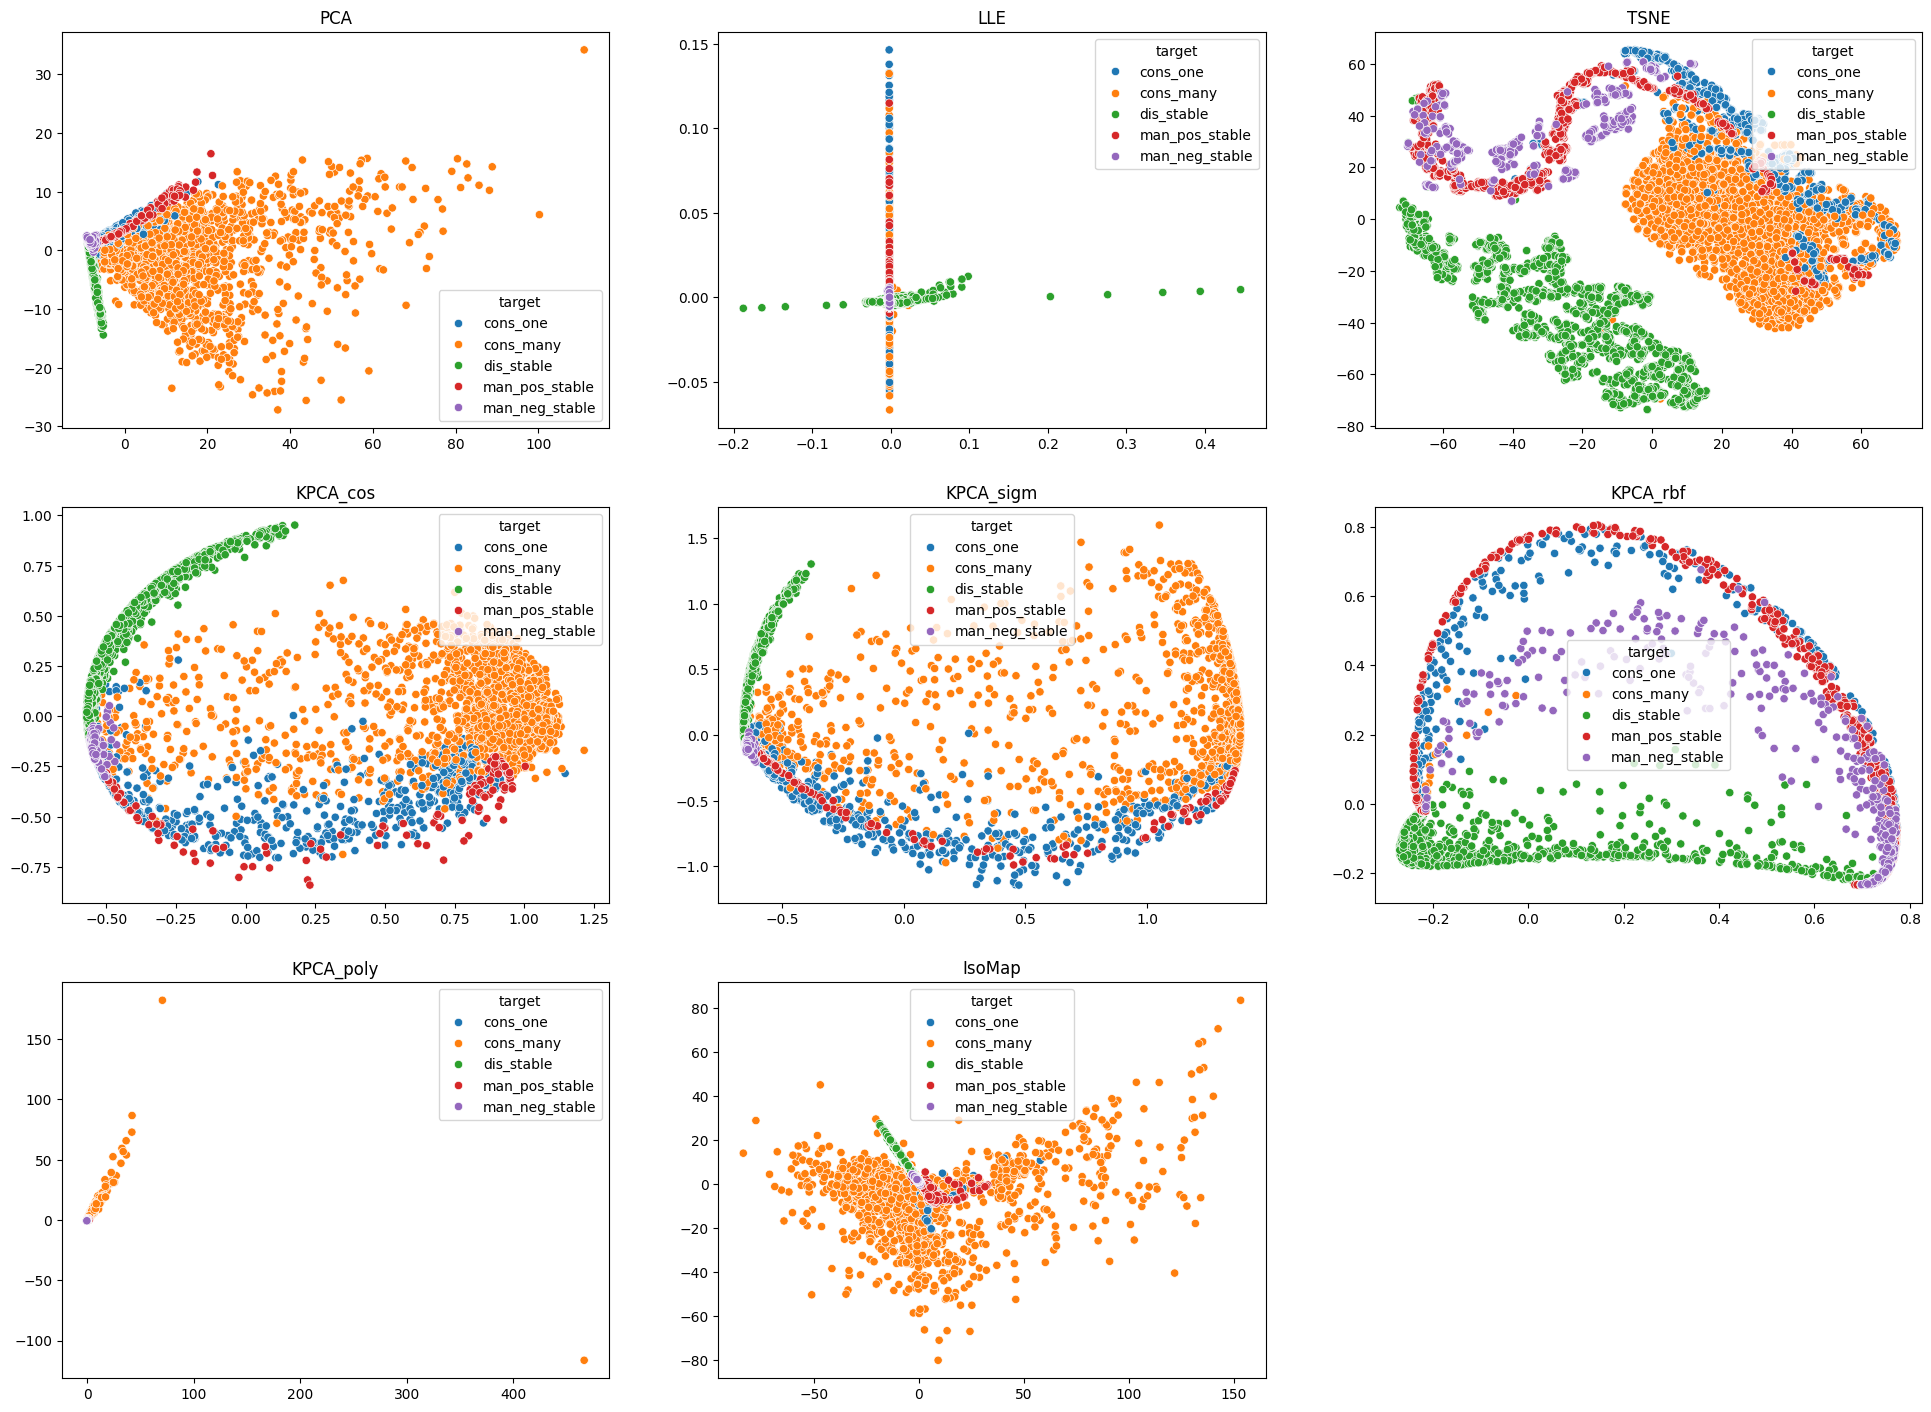

In [8]:
plt.figure(figsize=(24, 36))
for j,(name, model) in enumerate(dim_reduction_methods.items()):
    plt.subplot(6, 3, j + 1, aspect="auto")

    X_embedded = model.fit_transform(X)
    sns.scatterplot(x=X_embedded[:, 0],y=X_embedded[:, 1], hue=y)
    plt.title(f"{name}")
plt.show()